In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, ZeroPadding2D,GlobalAveragePooling2D,Flatten
from keras.layers import BatchNormalization
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np
import random
# from keras.utils import np_utils
from keras.callbacks import History

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print("training matrix shape", x_train.shape)
print("testing Matrix shape", x_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
training matrix shape (60000, 28, 28, 1)
testing Matrix shape (10000, 28, 28, 1)


In [ ]:
nb_classes = 10
y_train = to_categorical(y_train, nb_classes)
y_test = to_categorical(y_test, nb_classes)

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(BatchNormalization(axis=-1))
convLayer01 = Activation('relu')
model.add(convLayer01)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.add(Conv2D(32,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer02=MaxPooling2D(pool_size=(2,2))
model.add(convLayer02)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
convLayer03=Activation('relu')
model.add(convLayer03)

model.add(Conv2D(64,(3,3)))
model.add(BatchNormalization(axis=-1))
model.add(Activation('relu'))
convLayer04=MaxPooling2D(pool_size=(2,2))
model.add(convLayer04)
model.add(Flatten())

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Dropout(0.2))
model.add(Dense(10))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 26, 26, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 26, 26, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 10, 10, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 10, 10, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │              

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,height_shift_range=0.08,zoom_range=0.08)
test_gen = ImageDataGenerator()

In [ ]:
train_generator = gen.flow(x_train, y_train, batch_size=10)
test_generator = test_gen.flow(x_test, y_test, batch_size=10)

In [ ]:
history = History()

In [ ]:
history = model.fit(train_generator, steps_per_epoch=60000//128, epochs=50,verbose=1,validation_data=test_generator,validation_steps=10000//128)

Epoch 1/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9653 - loss: 0.1140 - val_accuracy: 0.9859 - val_loss: 0.0504
Epoch 2/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9760 - loss: 0.0811 - val_accuracy: 0.9897 - val_loss: 0.0456
Epoch 3/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9779 - loss: 0.0656 - val_accuracy: 0.9923 - val_loss: 0.0173
Epoch 4/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9783 - loss: 0.0740 - val_accuracy: 0.9846 - val_loss: 0.0382
Epoch 5/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9780 - loss: 0.0776 - val_accuracy: 0.9936 - val_loss: 0.0337
Epoch 6/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9774 - loss: 0.0751 - val_accuracy: 0.9897 - val_loss: 0.0316
Epoch 7/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9754 - loss: 0.0827 - val_accuracy: 0.9910 - val_loss: 0.0245
Epoch 8/50
468/468 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9703 - loss: 0.0983 - val_accuracy: 0

<function matplotlib.pyplot.legend(*args, **kwargs)>

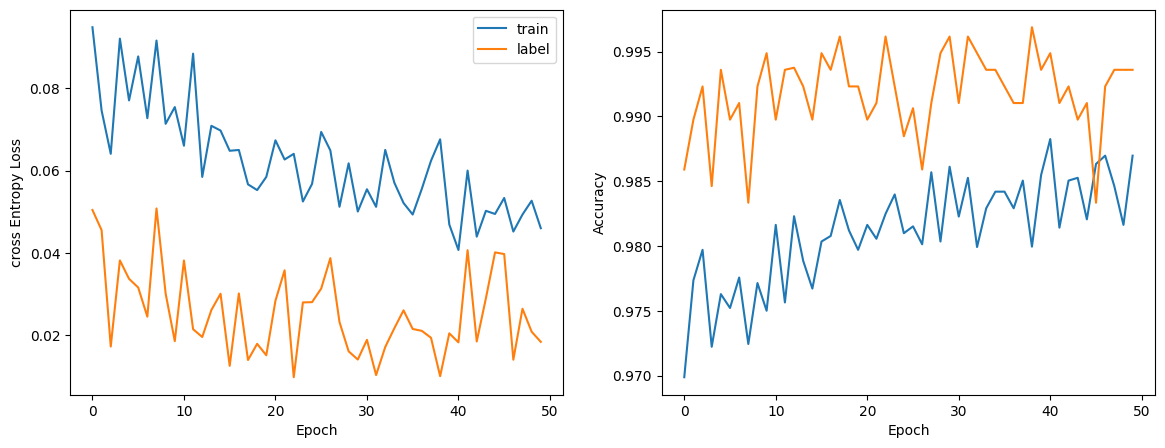

In [ ]:
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='label')
plt.xlabel('Epoch')
plt.ylabel('cross Entropy Loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='label')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend